# Homework 1

**Start date:** *18th Jan 2017*

**Due date:** *04 February 2017, 11:55 pm*

## How to Submit

When you have completed the exercises and everything has finsihed running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_hw1.ipynb** before the deadline above.

Also send a **sharable link** to the notebook at the following email: ucl.coursework.submit@gmail.com. You can also make it sharable via link to everyone, up to you.

### IMPORTANT
Please make sure you submission includes **all results/plots/tables** required for grading. We will not re-run your code.

## The Data

### Handwritten Digit Recognition Dataset (MNIST)

In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). 

The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. 

The images have a resolution of $28\times 28$ pixels.

### The MNIST Dataset in TensorFlow

You can use the tensorflow build-in functionality to download and import the dataset into python (see *Setup* section below).

## The Assignment

### Objectives

You will use TensorFlow to implement several neural network models (labelled Model 1-4, and described in the corresponding sections of the Colab).

You will then train these models to classify hand written digits from the Mnist dataset.

### Variable Initialization

Initialize the variables containing the parameters using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a.html).

    initializer = tf.contrib.layers.xavier_initializer()
    my_variable = tf.Variable(initializer(shape))

### Hyper-parameters

For each of these models you will be requested to run experiments with different hyper-parameters.

More specifically, you will be requested to try 3 sets of hyper-parameters per model, and report the resulting model accuracy.

Each combination of hyper-parameter will specify how to set each of the following:

- **num_epochs**: Number of iterations through the training section of the dataset [*a positive integer*].

- **learning_rate**: Learning rate used by the gradient descent optimizer [*a scalar between 0 and 1*]

In all experiments use a *batch_size* of 100.

### Loss function
All models, should be trained as to minimize the **cross-entropy loss** function:
$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$.

*Note*: Sum the loss across the elements of the batch with tf.reduce_sum().

*Hint*: read about TensorFlow's [tf.nn.softmax_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits) function.

### Optimization

Use **stochastic gradient descent (SGD)** for optimizing the loss function.

Hint: read about TensorFlow's [tf.train.GradientDescentOptimizer()](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer).


### Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes: 

- train

- validation

- test

Use only the **train** data in order to optimize the model.

Use *datasets.train.next_batch(100)* in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, 

each time evaluate the accuracy of the model both on 20% of the **train** set and on the entire **test** set.

### Reporting

For each model i, you will collect the learning curves associated to each combination of hyper-parameters.

Use the utility function `plot_learning_curves` to plot these learning curves,

and the and utility function `plot_summary_table` to generate a summary table of results.

For each run collect the train and test curves in a tuple, together with the hyper-parameters.

    experiments_task_i = [

       (num_epochs_1, learning_rate_1), train_accuracy_1, test_accuracy_1),
    
       (num_epochs_2, learning_rate_2), train_accuracy_2, test_accuracy_2),
    
       (num_epochs_3, learning_rate_3), train_accuracy_3, test_accuracy_3)]

### Hint 

If you need some extra help, familiarizing yourselves with the dataset and the task of building models in TensorFlow, you can check the [TF tutorial for MNIST](https://www.tensorflow.org/tutorials/mnist/beginners/). 

The tutorial will walk you through the MNIST classification task step-by-step, building and optimizing a model in TensorFlow. 

(Please do not copy the provided code, though. Walk through the tutorial, but write your own implementation).

# Imports and utility functions (do not modify!)

In [0]:
# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# Global variables.
log_period_samples = 20000
batch_size = 100

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y_ = tf.placeholder(tf.float32, [None, 10])
  return x, y_

# Plot learning curves of experiments
def plot_learning_curves(experiment_data):
  # Generate figure.
  fig, axes = plt.subplots(3, 4, figsize=(22,12))
  st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter settings",
      fontsize="x-large")
  # Plot all learning curves.
  for i, results in enumerate(experiment_data):
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      # Plot.
      xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
      axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
      axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
      # Prettify individual plots.
      axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      axes[j, i].set_xlabel('Number of samples processed')
      axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
      axes[j, i].set_title('Task {}'.format(i + 1))
      axes[j, i].legend()
  # Prettify overall figure.
  plt.tight_layout()
  st.set_y(0.95)
  fig.subplots_adjust(top=0.91)
  plt.show()

# Generate summary table of results.
def plot_summary_table(experiment_data):
  # Fill Data.
  cell_text = []
  rows = []
  columns = ['Setting 1', 'Setting 2', 'Setting 3']
  for i, results in enumerate(experiment_data):
    rows.append('Model {}'.format(i + 1))
    cell_text.append([])
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      cell_text[i].append(test_accuracy[-1])
  # Generate Table.
  fig=plt.figure(frameon=False)
  ax = plt.gca()
  the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
  the_table.scale(1, 4)
  # Prettify.
  ax.patch.set_facecolor('None')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

# Model 1 (20 pts)

### Model

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=5, *learning_rate*=0.1

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task1 = []
settings = [(5, 0.0001), (5, 0.005), (5, 0.1)]

In [4]:
print('Training Model 1')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:

  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()
  x, y_ = get_placeholders()
  mnist = get_data()
  eval_mnist = get_data()

  # Define model, loss, update and evaluation metric. 
  initializer = tf.contrib.layers.xavier_initializer()
  w = tf.Variable(initializer([784,10]))
  b = tf.Variable(initializer([10]))
  logits = tf.matmul(x,w)+b
  y = tf.nn.softmax(logits)        
  loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=logits))
  train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)  
  correct_prediction = tf.equal(tf.argmax(y_,1),tf.argmax(y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:                  
    while mnist.train.epochs_completed < num_epochs:
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      # Training step
      sess.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})
      
      # Periodically evaluate.
      if i % log_period_updates == 0:

        # Compute and store train accuracy on 20% training data.
        a=0.2
        ex = eval_mnist.train.images
        ey = eval_mnist.train.labels
        size = int(ey.shape[0]*a)
        part_ex = ex[0:size,:]    
        part_ey = ey[0:size,:]
        train = sess.run(accuracy,feed_dict={x:part_ex,y_:part_ey})
        print("%d th iter train accuracy %f" %(i,train)) 
        train_accuracy.append(train)  

        # Compute and store test accuracy. 
        test = sess.run(accuracy,feed_dict={x:eval_mnist.test.images,y_:eval_mnist.test.labels})
        print("%d th iter test accuracy %f" %(i,test))  
        test_accuracy.append(test)   
        
  # save in a list
  experiments_task1.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 1
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
200 th iter train accuracy 0.763636
200 th iter test accuracy 0.783000
400 th iter train accuracy 0.815182
400 th iter test accuracy 0.834500
600 th iter train accuracy 0.833273
600 th iter test accuracy 0.848400
800 th iter train accuracy 0.844000
800 th iter test accuracy 0.859400
1000 th iter train accuracy 0.853636
1000 th iter test accuracy 0.866500
1200 th iter train accuracy 0.857000
1200 th iter test accuracy 0.872100
1400 th iter train accuracy 0.860545
1400 th iter test accuracy 0.876100
1600 th iter train accuracy 0.864455
1600 th iter test accuracy 0.879100
1800 th iter train 

# Model 2 (20 pts)

1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]

In [15]:
print('Training Model 2')

# Train Model 2 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  # Define model, loss, update and evaluation metric.
  initializer = tf.contrib.layers.xavier_initializer()
  
  # non-linear layer 
  w_1 = tf.Variable(initializer([784,32]))
  b_1 = tf.Variable(initializer([32]))
  h_1 = tf.nn.relu(tf.matmul(x,w_1)+b_1)

  # linear layer 
  w_2 = tf.Variable(initializer([32,10]))
  b_2 = tf.Variable(initializer([10]))
  logits = tf.matmul(h_1,w_2)+b_2
  y = tf.nn.softmax(logits)
  loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=logits))
  train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
  # evalutaion
  correct_prediction = tf.equal(tf.argmax(y_,1),tf.argmax(y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:   
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      # Training step
      sess.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        # Compute and store train accuracy on 20% training data.
        a=0.2
        ex = eval_mnist.train.images
        ey = eval_mnist.train.labels
        size = int(ey.shape[0]*a)
        part_ex = ex[0:size,:]    
        part_ey = ey[0:size,:]
        train = sess.run(accuracy,feed_dict={x:part_ex,y_:part_ey})
        print("%d th iter train accuracy %f" %(i,train)) 
        train_accuracy.append(train)  
        
        # Compute and store test accuracy. 
        test = sess.run(accuracy,feed_dict={x:eval_mnist.test.images,y_:eval_mnist.test.labels})
        print("%d th iter test accuracy %f" %(i,test))  
        test_accuracy.append(test) 
        
    experiments_task2.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
200 th iter train accuracy 0.673273
200 th iter test accuracy 0.687100
400 th iter train accuracy 0.788455
400 th iter test accuracy 0.806000
600 th iter train accuracy 0.823818
600 th iter test accuracy 0.836000
800 th iter train accuracy 0.841364
800 th iter test accuracy 0.857000
1000 th iter train accuracy 0.856636
1000 th iter test accuracy 0.866200
1200 th iter train accuracy 0.865000
1200 th iter test accuracy 0.875800
1400 th iter train accuracy 0.874636
1400 th iter test accuracy 0.882800
1600 th iter train accuracy 0.878636
1600 th iter test accuracy 0.889100
1800 th iter train 

# Model 3 (20 pts)

2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.05

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task3 = []
settings = [(5, 0.003), (40, 0.003), (40, 0.05)]

In [10]:
print('Training Model 3')

# Train Model 3 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  # Define model, loss, update and evaluation metric.
  initializer = tf.contrib.layers.xavier_initializer()
  
  # non-linear layer 1
  w_1 = tf.Variable(initializer([784,32]))
  b_1 = tf.Variable(initializer([32]))
  h_1 = tf.nn.relu(tf.matmul(x,w_1)+b_1)

  # non-linear layer 2
  w_2 = tf.Variable(initializer([32,32]))
  b_2 = tf.Variable(initializer([32]))
  h_2 = tf.nn.relu(tf.matmul(h_1,w_2)+b_2)
  
  # linear layer 
  w_3 = tf.Variable(initializer([32,10]))
  b_3 = tf.Variable(initializer([10]))
  logits = tf.matmul(h_2,w_3)+b_3
  y = tf.nn.softmax(logits)
  loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=logits))
  train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
  # evalutaion
  correct_prediction = tf.equal(tf.argmax(y_,1),tf.argmax(y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      # Training step 
      sess.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        # Compute and store train accuracy on 20% training data.
        a=0.2
        ex = eval_mnist.train.images
        ey = eval_mnist.train.labels
        size = int(ey.shape[0]*a)
        part_ex = ex[0:size,:]    
        part_ey = ey[0:size,:]
        train = sess.run(accuracy,feed_dict={x:part_ex,y_:part_ey})
        print("%d th iter train accuracy %f" %(i,train)) 
        train_accuracy.append(train)  
        
        # Compute and store test accuracy. 
        test = sess.run(accuracy,feed_dict={x:eval_mnist.test.images,y_:eval_mnist.test.labels})
        print("%d th iter test accuracy %f" %(i,test))  
        test_accuracy.append(test) 

    experiments_task3.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
200 th iter train accuracy 0.872636
200 th iter test accuracy 0.873800
400 th iter train accuracy 0.895636
400 th iter test accuracy 0.901100
600 th iter train accuracy 0.939818
600 th iter test accuracy 0.938400
800 th iter train accuracy 0.930455
800 th iter test accuracy 0.926900
1000 th iter train accuracy 0.959364
1000 th iter test accuracy 0.956500
1200 th iter train accuracy 0.960091
1200 th iter test accuracy 0.954600
1400 th iter train accuracy 0.963636
1400 th iter test accuracy 0.961000
1600 th iter train accuracy 0.962182
1600 th iter test accuracy 0.961900
1800 th iter train 

3800 th iter train accuracy 0.089273
3800 th iter test accuracy 0.089200
4000 th iter train accuracy 0.103818
4000 th iter test accuracy 0.102800
4200 th iter train accuracy 0.102455
4200 th iter test accuracy 0.098000
4400 th iter train accuracy 0.113182
4400 th iter test accuracy 0.113500
4600 th iter train accuracy 0.113182
4600 th iter test accuracy 0.113500
4800 th iter train accuracy 0.102455
4800 th iter test accuracy 0.098000
5000 th iter train accuracy 0.096273
5000 th iter test accuracy 0.097400
5200 th iter train accuracy 0.113182
5200 th iter test accuracy 0.113500
5400 th iter train accuracy 0.113182
5400 th iter test accuracy 0.113500
5600 th iter train accuracy 0.097000
5600 th iter test accuracy 0.103200
5800 th iter train accuracy 0.097000
5800 th iter test accuracy 0.103200
6000 th iter train accuracy 0.103818
6000 th iter test accuracy 0.102800
6200 th iter train accuracy 0.096273
6200 th iter test accuracy 0.097400
6400 th iter train accuracy 0.106364
6400 th iter t

# Model 4 (20 pts)

### Model
3 layer convolutional model (2 convolutional layers followed by max pooling) + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- Employ plain convolution (no stride) and for max pooling operations use 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- num_epochs=5, learning_rate=0.01

- num_epochs=10, learning_rate=0.001

- num_epochs=20, learning_rate=0.001 


In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task4 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

In [21]:
print('Training Model 4')

# Train Model 4 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  x_image = tf.reshape(x, [-1, 28, 28, 1])
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  # Define model, loss, update and evaluation metric. 
  initializer = tf.contrib.layers.xavier_initializer()
  
  # conv layer 1
  w_conv1 = tf.Variable(initializer([3,3,1,8]))
  b_conv1 = tf.Variable(initializer([8]))
  h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, w_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
  h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  
  # conv layer 2
  w_conv2 = tf.Variable(initializer([3,3,8,8]))
  b_conv2 = tf.Variable(initializer([8]))
  h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, w_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
  h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

  # flatten
  h_flat = tf.reshape(h_pool2, [-1, 7*7*8])
  
  # non-linear layer
  w_n = tf.Variable(initializer([7*7*8,32]))
  b_n = tf.Variable(initializer([32]))
  h_n = tf.nn.relu(tf.matmul(h_flat,w_n)+b_n)
  
  # linear layer + softmax & loss
  w_linear = tf.Variable(initializer([32,10]))
  b_linear = tf.Variable(initializer([10]))
  logits = tf.matmul(h_n,w_linear)+b_linear
  y = tf.nn.softmax(logits)
  loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=logits))
  train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
  # evalutaion
  correct_prediction = tf.equal(tf.argmax(y_,1),tf.argmax(y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      # Training step 
      sess.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        # Compute and store train accuracy on 20% training data.
        a=0.2
        ex = eval_mnist.train.images
        ey = eval_mnist.train.labels
        size = int(ey.shape[0]*a)
        part_ex = ex[0:size,:]    
        part_ey = ey[0:size,:]
        train = sess.run(accuracy,feed_dict={x:part_ex,y_:part_ey})
        print("%d th iter train accuracy %f" %(i,train)) 
        train_accuracy.append(train)  
        
        # Compute and store test accuracy. 
        test = sess.run(accuracy,feed_dict={x:eval_mnist.test.images,y_:eval_mnist.test.labels})
        print("%d th iter test accuracy %f" %(i,test))  
        test_accuracy.append(test) 

    experiments_task4.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 4
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
200 th iter train accuracy 0.113182
200 th iter test accuracy 0.113500
400 th iter train accuracy 0.106364
400 th iter test accuracy 0.101000
600 th iter train accuracy 0.113182
600 th iter test accuracy 0.113500
800 th iter train accuracy 0.113182
800 th iter test accuracy 0.113500
1000 th iter train accuracy 0.113182
1000 th iter test accuracy 0.113500
1200 th iter train accuracy 0.113182
1200 th iter test accuracy 0.113500
1400 th iter train accuracy 0.103818
1400 th iter test accuracy 0.102800
1600 th iter train accuracy 0.103818
1600 th iter test accuracy 0.102800
1800 th iter train 

# Evaluation

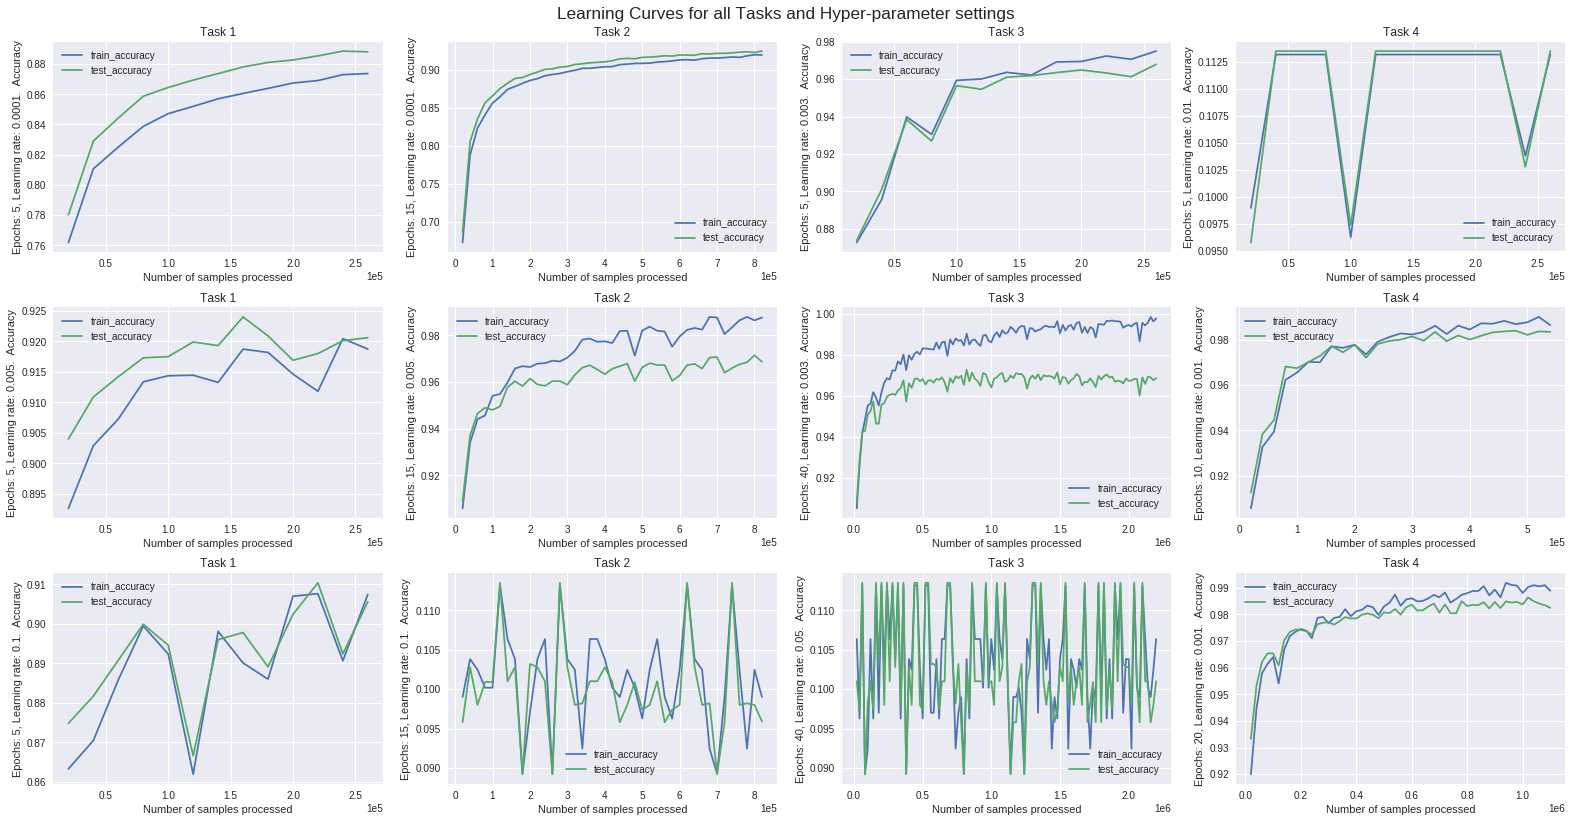

In [24]:
plot_learning_curves([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

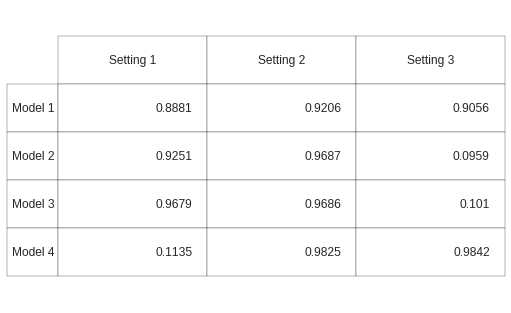

In [21]:
plot_summary_table([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

# Questions

### Q1 (5 pts): Indicate which of the previous experiments constitute an example of over-fitting. Why is this happening?
Task 2 Setting 2: training for so long & learning rate is high

Task 3 Setting 2: training for so long

Task 4 Setting 3: training for so long & model is complex


### Q2 (5 pts): Indicate which of the previous experiments constitute an example of under-fitting. Why is this happening?
Task 2 Setting 3 & Task 3 Setting 3 & Task 4 Setting 1: learning rate is too high

Task 1 Setting 1-3: the model is too simple(linear)

Task 2 Setting 1: not enough training  



### Q3 (10 pts): How would you prevent over-/under-fitting from happening?
To prevent overfitting, we can 

- Stop training early

- Use simpler model

- Use fewer features

- Increase regularisation

- Use batch normalisation


To prevernt underfitting

- Train for longer

- Use more complex model

- Use more features

- Reduce regularisation

- Feed more training data


# Extension (Ungraded)

In the previous tasks you have used plain Stohastic Gradient Descent to train the models.

There is a large literatures on variants of Stochastic Gradient Descent, that improve learning speed and robustness to hyper-parameters.

[Here](https://www.tensorflow.org/api_docs/python/train/optimizers) you can find the documentation for several optimizers already implemented in TensorFlow, as well as the original papers proposing these methods.*italicized text*.

AdamOptimizer and RMSProp are among the most commonly employed in Deep Learning.

How does replacing SGD with these optimizers affect the previous results?

In [14]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7492020403352376787, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 263979008
 locality {
   bus_id: 1
 }
 incarnation: 5201923261090323411
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
# CAREFUL: Running this CL resets the experiments_task5 using RMSPropOptimizer dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task5 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

In [18]:
print('Training Model 4.2')

# Train Model 4.2 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  x_image = tf.reshape(x, [-1, 28, 28, 1])
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  # Define model, loss, update and evaluation metric. 
  initializer = tf.contrib.layers.xavier_initializer()
  
  # conv layer 1
  w_conv1 = tf.Variable(initializer([3,3,1,8]))
  b_conv1 = tf.Variable(initializer([8]))
  h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, w_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
  h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  
  # conv layer 2
  w_conv2 = tf.Variable(initializer([3,3,8,8]))
  b_conv2 = tf.Variable(initializer([8]))
  h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, w_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
  h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

  # flatten
  h_flat = tf.reshape(h_pool2, [-1, 7*7*8])
  
  # non-linear layer
  w_n = tf.Variable(initializer([7*7*8,32]))
  b_n = tf.Variable(initializer([32]))
  h_n = tf.nn.relu(tf.matmul(h_flat,w_n)+b_n)
  
  # linear layer + softmax & loss
  w_linear = tf.Variable(initializer([32,10]))
  b_linear = tf.Variable(initializer([10]))
  logits = tf.matmul(h_n,w_linear)+b_linear
  y = tf.nn.softmax(logits)
  loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=logits))
  train_step = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)
  
  # evalutaion
  correct_prediction = tf.equal(tf.argmax(y_,1),tf.argmax(y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      # Training step 
      sess.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        # Compute and store train accuracy on 20% training data.
        a=0.2
        ex = eval_mnist.train.images
        ey = eval_mnist.train.labels
        size = int(ey.shape[0]*a)
        part_ex = ex[0:size,:]    
        part_ey = ey[0:size,:]
        train = sess.run(accuracy,feed_dict={x:part_ex,y_:part_ey})
        print("%d th iter train accuracy %f" %(i,train)) 
        train_accuracy.append(train)  
        
        # Compute and store test accuracy. 
        test = sess.run(accuracy,feed_dict={x:eval_mnist.test.images,y_:eval_mnist.test.labels})
        print("%d th iter test accuracy %f" %(i,test))  
        test_accuracy.append(test) 

    experiments_task5.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 4.2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
200 th iter train accuracy 0.940364
200 th iter test accuracy 0.946700
400 th iter train accuracy 0.958727
400 th iter test accuracy 0.968200
600 th iter train accuracy 0.967091
600 th iter test accuracy 0.968600
800 th iter train accuracy 0.976182
800 th iter test accuracy 0.976400
1000 th iter train accuracy 0.977909
1000 th iter test accuracy 0.977400
1200 th iter train accuracy 0.978818
1200 th iter test accuracy 0.976700
1400 th iter train accuracy 0.980545
1400 th iter test accuracy 0.977400
1600 th iter train accuracy 0.979909
1600 th iter test accuracy 0.977600
1800 th iter trai

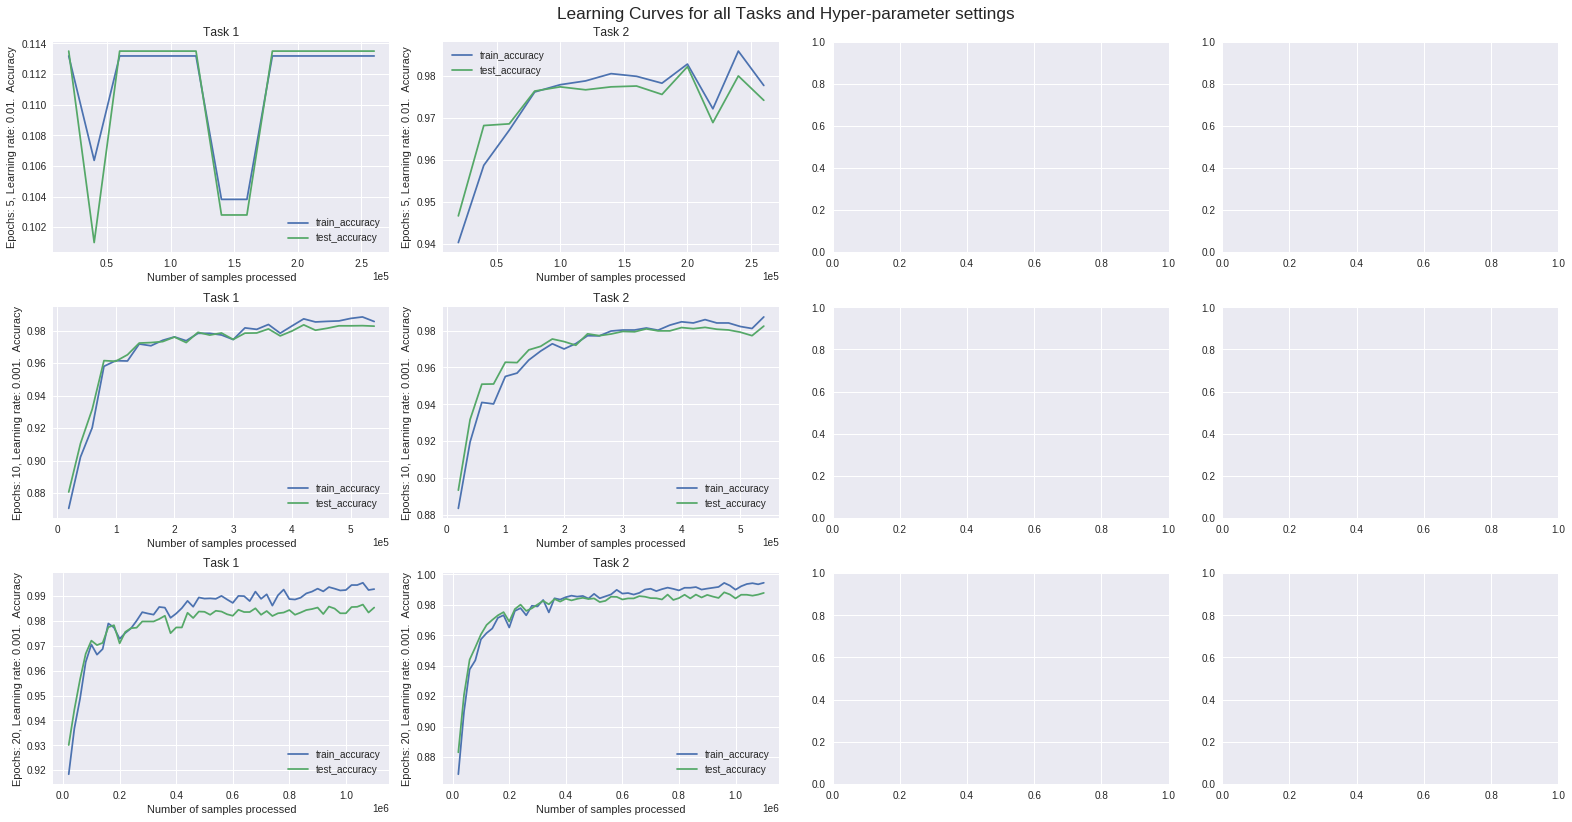

In [22]:
plot_learning_curves([experiments_task4, experiments_task5])

From the curves we can see that, RMSProp is much steadier than SGD. Even for a larger learning rate, this method is still able to find better parameters without suffering from gradient problems. Also, it finds optimal values more quickly. This is the advantage of mini-batch with a flexible learning rate.